In [1]:
import os
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
zip_path = '/content/train.zip'
extract_path = '/content/train_extracted'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset extracted!")

Dataset extracted!


In [6]:
import os
import shutil

# Paths
source_path = '/content/train_extracted/train'
cat_path = '/content/train/cats'
dog_path = '/content/train/dogs'

# Create target directories
os.makedirs(cat_path, exist_ok=True)
os.makedirs(dog_path, exist_ok=True)

# Valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

# Move images to respective folders
for filename in os.listdir(source_path):
    file_path = os.path.join(source_path, filename)
    if filename.lower().startswith('cat') and filename.lower().endswith(valid_extensions):
        shutil.move(file_path, os.path.join(cat_path, filename))
    elif filename.lower().startswith('dog') and filename.lower().endswith(valid_extensions):
        shutil.move(file_path, os.path.join(dog_path, filename))

# Check how many images are in each folder
num_cats = len(os.listdir(cat_path))
num_dogs = len(os.listdir(dog_path))

print(f"Images organized successfully!")
print(f"Number of images in 'cats' folder: {num_cats}")
print(f"Number of images in 'dogs' folder: {num_dogs}")


Images organized successfully!
Number of images in 'cats' folder: 12500
Number of images in 'dogs' folder: 2442


In [8]:
train_dir = '/content/train'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.2  # Use 20% of data for validation
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary',  # Binary classification (cats vs. dogs)
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 11954 images belonging to 2 classes.
Found 2988 images belonging to 2 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 5: Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20  # Adjust the number of epochs as needed
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


374/374 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.8375 - loss: 0.4450 - val_accuracy: 0.8514 - val_loss: 0.3767
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.8537 - loss: 0.3695 - val_accuracy: 0.8621 - val_loss: 0.3516
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.8709 - loss: 0.3239 - val_accuracy: 0.8598 - val_loss: 0.3390
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8725 - loss: 0.3088 - val_accuracy: 0.8725 - val_loss: 0.3243
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.8868 - loss: 0.2837 - val_accuracy: 0.8722 - val_loss: 0.3400
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8971 - loss: 0.2601 - val_accuracy: 0.8725 - val_loss: 0.3047
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9010 - loss: 0.2393 - val_accuracy: 0.8832 - val_loss: 0.2938
Epoch 8/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.9113 - loss: 0.2209 - val_accurac

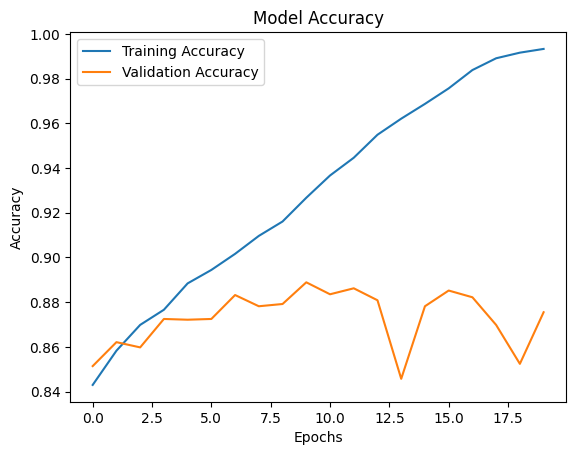

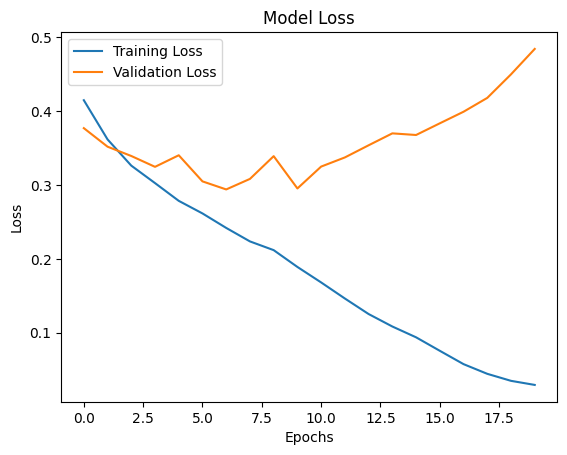

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Saving dog.12159.jpg to dog.12159.jpg


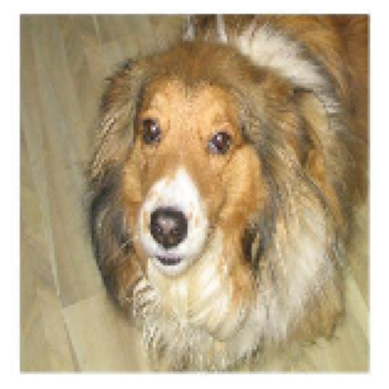

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: It's a Dog!


In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def predict_uploaded_image(model):
    uploaded = files.upload()

    for img_name in uploaded.keys():

        img_path = img_name
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)


        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Make prediction
        prediction = model.predict(img_array)[0][0]
        if prediction > 0.5:
            print("Prediction: It's a Dog!")
        else:
            print("Prediction: It's a Cat!")


predict_uploaded_image(model)
